#deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Memanggil dataset

In [2]:
df = pd.read_csv('hyundi.csv')

Deskripsi dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


In [5]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


VISUALISASI DATA

<AxesSubplot:>

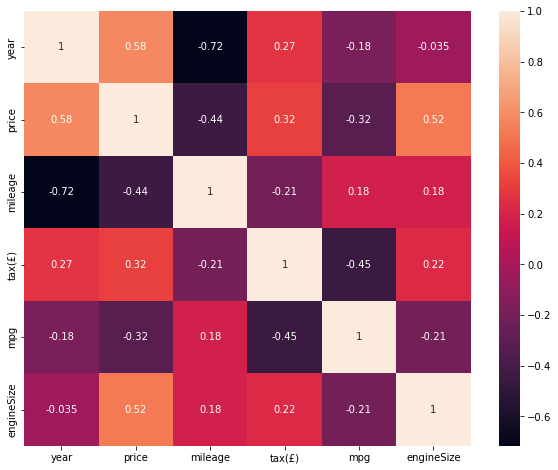

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

JUMLAH MOBIL BERDASARKAN MODEL

In [7]:
models = df.groupby('model').count()[['tax(£)']].sort_values(by='tax(£)', ascending=True).reset_index()
models = models.rename(columns={'tax(£)': 'NumberofCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Accent'),
  Text(1, 0, ' Amica'),
  Text(2, 0, ' Terracan'),
  Text(3, 0, ' Veloster'),
  Text(4, 0, ' Getz'),
  Text(5, 0, ' I800'),
  Text(6, 0, ' IX35'),
  Text(7, 0, ' I40'),
  Text(8, 0, ' IX20'),
  Text(9, 0, ' Santa Fe'),
  Text(10, 0, ' Ioniq'),
  Text(11, 0, ' Kona'),
  Text(12, 0, ' I20'),
  Text(13, 0, ' I30'),
  Text(14, 0, ' I10'),
  Text(15, 0, ' Tucson')])

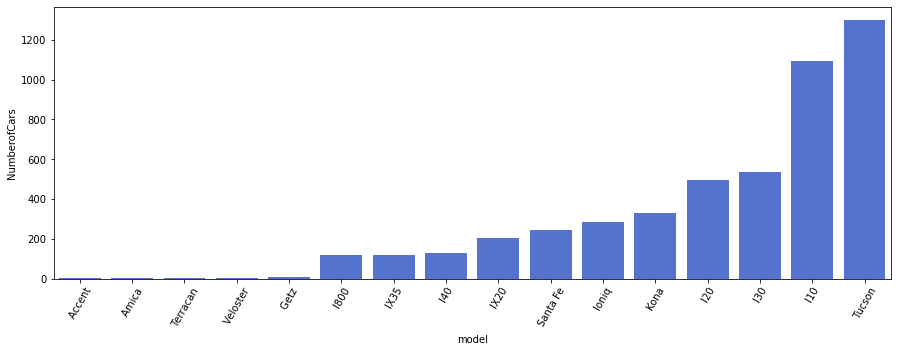

In [8]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['NumberofCars'], color='royalblue')
plt.xticks(rotation=60)

UKURAN MESIN

In [9]:
engine = df.groupby('engineSize').count()[['tax(£)']].sort_values(by='tax(£)').reset_index()
engine = engine.rename(columns={'tax(£)':'count'})

<AxesSubplot:xlabel='engineSize', ylabel='count'>

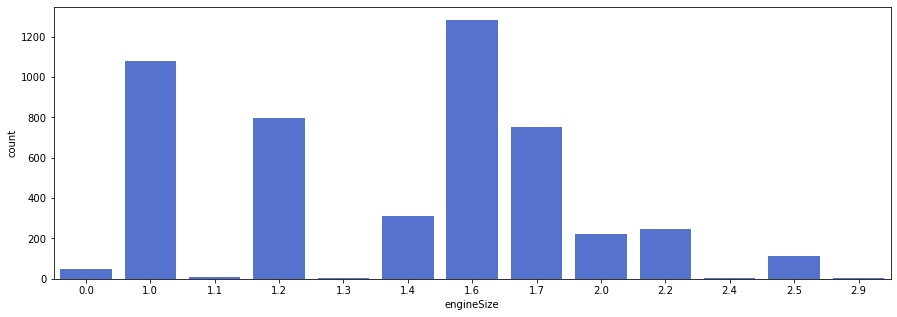

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

DISTRIBUSI MILEAGE

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

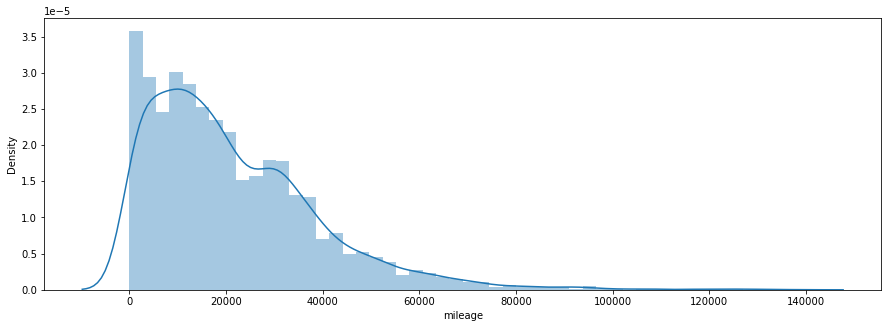

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

DISTRIBUSI HARGA MOBIL

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

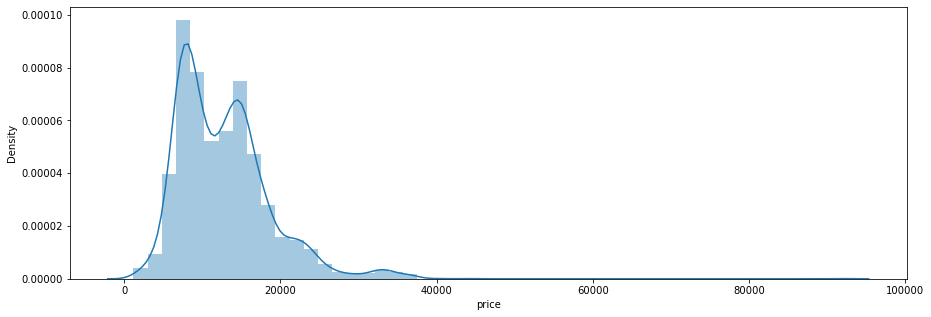

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

SELEKSI FITUR

In [13]:
features = ['year', 'mileage', 'tax(£)', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((4860, 5), (4860,))

SPLIT DATA TRAINING DAN DATA TESTING

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1215,)

MODEL REGRESI LINIER

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.6943788238567725


INPUT MODEL REGRESI LINIER

In [17]:
#year=2019, mileage=5000, tax=45, mpg=30, enginesize=2
input_data = np.array([[2019, 5000, 145, 30, 2]])

prediction = lr.predict(input_data)
print('Estimasi Harga: ', prediction)

Estimasi Harga:  [22138.59128499]


c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVING MODEL PICKLE

In [18]:
import pickle

filename = 'Hyundai.sav'
pickle.dump(lr, open(filename, 'wb'))